In [4]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('G:/datasets/book_recomendacao'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

G:/datasets/book_recomendacao\Books.csv
G:/datasets/book_recomendacao\Ratings.csv
G:/datasets/book_recomendacao\Users.csv


In [5]:
# importando as bibliotecas necesssarias

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [6]:
books = pd.read_csv('G:/datasets/book_recomendacao/Books.csv')
ratings = pd.read_csv('G:/datasets/book_recomendacao/Ratings.csv')
user = pd.read_csv('G:/datasets/book_recomendacao/Users.csv')

In [7]:
books.head(1)

ISBN           Book-Title         Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology  Mark P. O. Morford                2002   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...

In [8]:
ratings.head(1)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0

In [9]:
user.head(1)

User-ID            Location  Age
0        1  nyc, new york, usa  NaN

In [10]:
# Merge no dataset - 

df = pd.merge(books, ratings, left_on='ISBN', right_on=('ISBN'))

In [11]:
df.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5

In [12]:
df.apply(pd.isnull).sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.apply(pd.isnull).sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

In [15]:
df.drop(columns=['ISBN','Year-Of-Publication','Image-URL-S','Image-URL-M'], axis=1, inplace=True)

In [16]:
df.head(2)

Book-Title           Book-Author                Publisher  \
0  Classical Mythology    Mark P. O. Morford  Oxford University Press   
1         Clara Callan  Richard Bruce Wright    HarperFlamingo Canada   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5

In [17]:
# eliminar os valores zeros da coluna book-Rating
df.drop(index=df[df['Book-Rating']==0].index, inplace=True)

In [18]:
df[df['Book-Rating']==0]

Empty DataFrame
Columns: [Book-Title, Book-Author, Publisher, Image-URL-L, User-ID, Book-Rating]
Index: []

In [19]:
# retirar as pontuações  da coluna book-Title

df['Book-Title'] = df['Book-Title'].apply(lambda x: re.sub("[\W_]+"," ",x).strip())

In [20]:
df['Book-Rating'].mean()

7.626687890953712

In [21]:
df['User-ID'].value_counts()

User-ID
11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
          ... 
116107       1
220131       1
149322       1
216883       1
259679       1
Name: count, Length: 68091, dtype: int64

In [22]:
df.sample(10)

Book-Title  \
659314    The Importance of Being Earnest and Other Plays   
224122  The Forgotten Peter Decker amp Rina Lazarus No...   
616464                In the Castle of the Flynns A Novel   
829770                                    The Peron Novel   
56253                                               Naked   
226392                                       Suddenly You   
827253                 Friends The One About the 1 Sitcom   
522376          Zen and the Art of Motorcycle Maintenance   
380131                                     Dancer A Novel   
486433                                    SLEEPING BEAUTY   

                Book-Author              Publisher  \
659314          Oscar Wilde          Penguin Books   
224122       Faye Kellerman                   Avon   
616464      Michael Raleigh   Sourcebooks Landmark   
829770  Tomas Eloy Martinez       Random House Inc   
56253         David Sedaris         Back Bay Books   
226392         Lisa Kleypas                   Avon   
827253       Lauren Johnson   New American Library   
522376      Robert M Pirsig  Bantam Doubleday Dell   
380131         Colum McCann     Metropolitan Books   
486433       Judith Michael                 Pocket   

                                              Image-URL-L  User-ID  \
659314  http://images.amazon.com/images/P/0140482091.0...   167750   
224122  http://images.amazon.com/images/P/0380730847.0...   258534   
616464  http://images.amazon.com/images/P/1570717974.0...    30994   
829770  http://images.amazon.com/images/P/0679722793.0...   101305   
56253   http://images.amazon.com/images/P/0316777730.0...      805   
226392  http://images.amazon.com/images/P/0380802325.0...   104123   
827253  http://images.amazon.com/images/P/0451209672.0...   101824   
522376  http://images.amazon.com/images/P/0553244582.0...    63004   
380131  http://images.amazon.com/images/P/0805067922.0...    97754   
486433  http://images.amazon.com/images/P/0671782525.0...   184513   

        Book-Rating  
659314            9  
224122            9  
616464            8  
829770            7  
56253             7  
226392            8  
827253            7  
522376           10  
380131            7  
486433            7

### SISTEMA DE RECOMENDAÇÃO BASEADO NA POPULARIDADE

In [23]:
def popular_books(df,n=100):
    
    rating_count=df.groupby("Book-Title").count()["Book-Rating"].reset_index()
    rating_count.rename(columns={"Book-Rating":"Número_de_votos"},inplace=True)
    
    rating_average=df.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating":"Avaliações_Médias"},inplace=True)
    
    popularBooks=rating_count.merge(rating_average,on="Book-Title")
    
    def weighted_rate(x):
        v=x["Número_de_votos"]
        R=x["Avaliações_Médias"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularBooks["Avaliações_Médias"].mean()
    m=popularBooks["Número_de_votos"].quantile(0.90)  

    popularBooks=popularBooks[popularBooks["Número_de_votos"] >=250]
    popularBooks["Popularidade"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularidade",ascending=False)

    return popularBooks[["Book-Title","Número_de_votos","Avaliações_Médias","Popularidade"]].reset_index(drop=True).head(n)

    

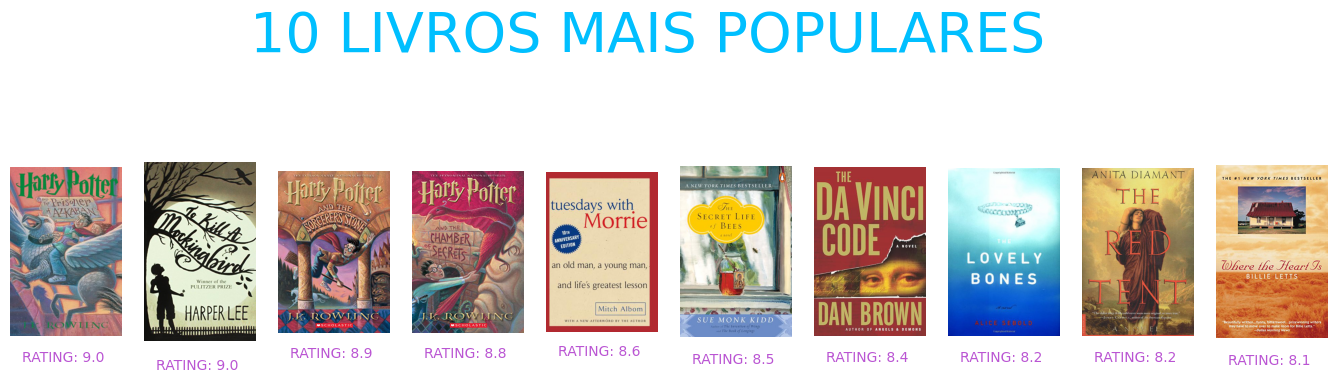

In [24]:

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

n=10

top_ten=pd.DataFrame(popular_books(df,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("10 LIVROS MAIS POPULARES",fontsize=40,color="deepskyblue")
for i in range(len(top_ten["Book-Title"].tolist())):
    url=df.loc[df["Book-Title"]==top_ten["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    
    img=Image.open(requests.get(url,stream=True, headers=headers).raw)
   
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()

### FILTRAGEM COLABORATIVA BASEADA EM ITEM

In [76]:
def item_based(bookTitle):
    
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    
    bookTitle=str(bookTitle)
    
    if bookTitle in df["Book-Title"].values:
        rating_count=pd.DataFrame(df["Book-Title"].value_counts())
        rare_books=rating_count[rating_count["count"]<=200].index
        common_books=df[~df["Book-Title"].isin(rare_books)]
        
        if bookTitle in rare_books:
            most_common=pd.Series(common_books["Book-Title"].unique()).sample(3).values
            print("Nenhuma recomendação para este livro ☹️ \n ")
            print("VOCÊ PODE TENTAR: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books_pivot=common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            title=common_books_pivot[bookTitle]
            recommendation_df=pd.DataFrame(common_books_pivot.corrwith(title).sort_values(ascending=False)).reset_index(drop=False)
            
            if bookTitle in [title for title in recommendation_df["Book-Title"]]:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==bookTitle].index[0])
                
            less_rating=[]
            for i in recommendation_df["Book-Title"]:
                if df[df["Book-Title"]==i]["Book-Rating"].mean() < 10:
                    less_rating.append(i)
            if recommendation_df.shape[0] - len(less_rating) > 5:
                recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]
                
            recommendation_df=recommendation_df[0:10]
            recommendation_df.columns=["Book-Title","Correlation"]
            
            fig, ax = plt.subplots(1,10,figsize=(17,5))
            fig.suptitle("VOCÊ GOSTARIA DE EXPERIMENTAR ESTES LIVROS?",fontsize=30,color="deepskyblue")
            for i in range(len(recommendation_df["Book-Title"].tolist())):
                url=df.loc[df["Book-Title"]==recommendation_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
                img=Image.open(requests.get(url,stream=True, headers=headers).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]==recommendation_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=12)
                fig.show()
    else:
        print("❌ NÃO CONSEGUI ENCONTRAR ❌")

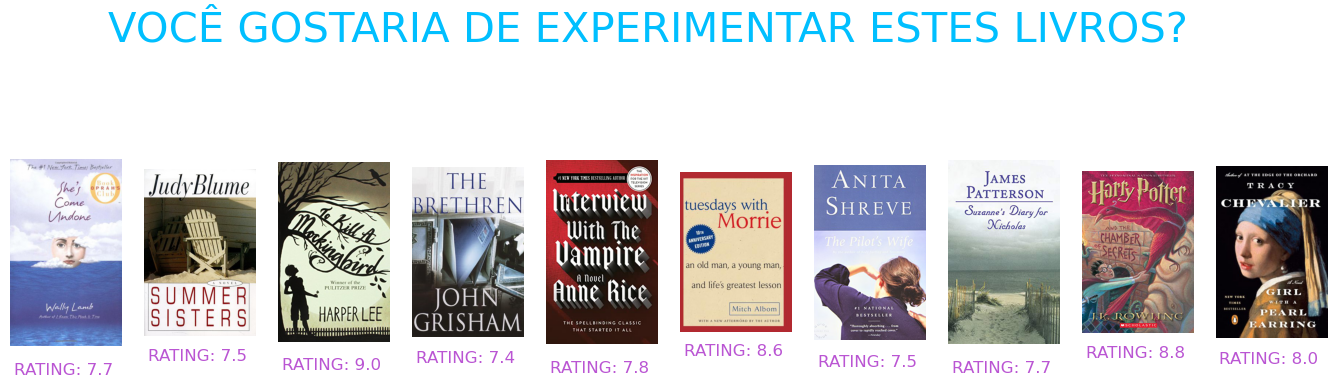

In [77]:
item_based("The Lovely Bones A Novel")

### FILTRAGEM COLABORATIVA BASEADA NO USUÁRIO

In [78]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 200]  # Eliminar usuários que votaram menos de 200 vezes.

users_pivot=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_pivot.fillna(0,inplace=True)

In [79]:
def users_choice(id):
    
    users_fav=new_df[new_df["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:5]
    return users_fav

In [80]:
def user_based(new_df,id):
    if id not in new_df["User-ID"].values:
        print("❌ Usuário não encontrado ❌")
        
        
    else:
        index=np.where(users_pivot.index==id)[0][0]
        similarity=cosine_similarity(users_pivot)
        similar_users=list(enumerate(similarity[index]))
        similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]
    
        user_rec=[]
    
        for i in similar_users:
                data=df[df["User-ID"]==users_pivot.index[i[0]]]
                user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))
        
    return user_rec

In [81]:
def common(new_df,user,user_id):
    
    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(user)
    for i in user:
        y=new_df[(new_df["User-ID"]==i)]
        books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
        books=books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(books["Book-Title"].values)
        
    return recommend_books[0:5]

🟦 Usuario: 216012 


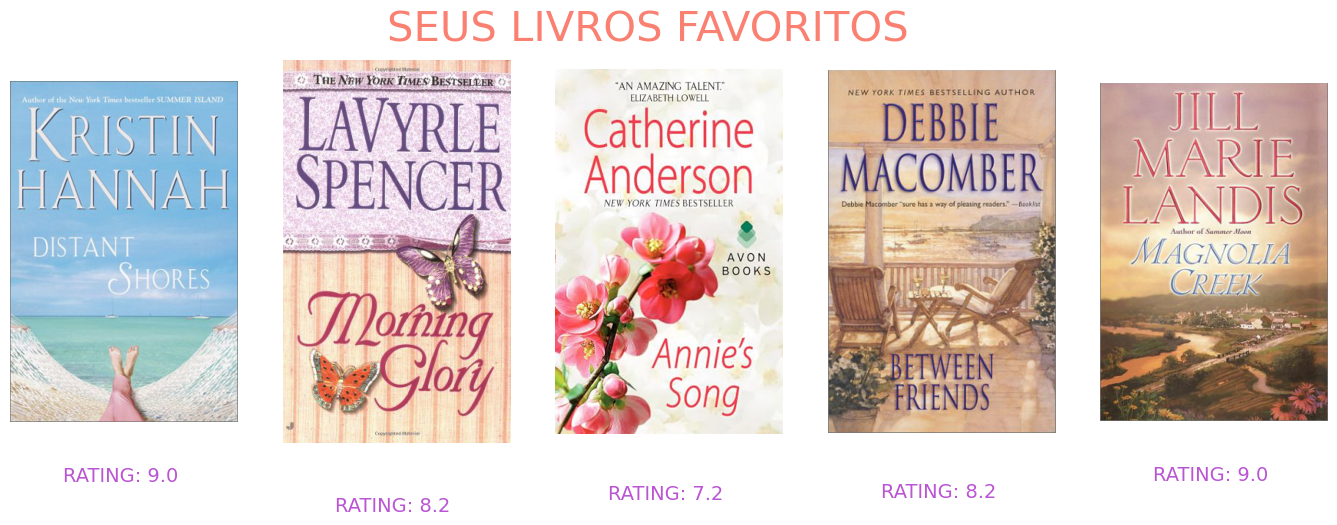

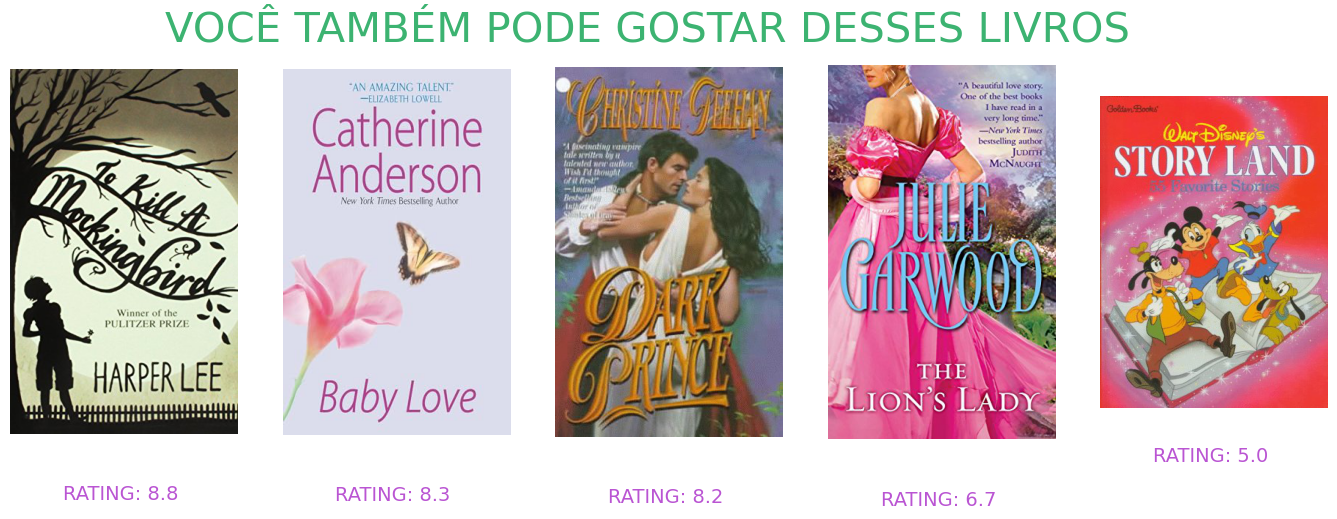

In [82]:
user_id=random.choice(new_df["User-ID"].values)
user_choice_df=pd.DataFrame(users_choice(user_id))
user_favorite=users_choice(user_id)
n=len(user_choice_df["Book-Title"].values)
print("🟦 Usuario: {} ".format(user_id))
    
fig,ax=plt.subplots(1,n,figsize=(17,5))
fig.suptitle("SEUS LIVROS FAVORITOS",fontsize=30,color="salmon")

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    
for i in range(n):
        url=new_df.loc[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
        img=Image.open(requests.get(url,stream=True, headers=headers).raw)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=14)
        fig.show()

user_based_rec=user_based(new_df,user_id)
books_for_user=common(new_df,user_based_rec,user_id)
books_for_userDF=pd.DataFrame(books_for_user,columns=["Book-Title"])

fig,ax=plt.subplots(1,5,figsize=(17,5))
fig.suptitle("VOCÊ TAMBÉM PODE GOSTAR DESSES LIVROS",fontsize=30,color="mediumseagreen")
for i in range(5):
    url=new_df.loc[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    img=Image.open(requests.get(url,stream=True, headers=headers).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=14)
    fig.show()


## FILTRAGEM COLABORATIVA BASEADA EM CONTEÚDO

In [85]:
def content_based(bookTitle):
    bookTitle=str(bookTitle)
    
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    
    if bookTitle in df["Book-Title"].values:
        rating_count=pd.DataFrame(df["Book-Title"].value_counts())
        rare_books=rating_count[rating_count["count"]<=200].index
        common_books=df[~df["Book-Title"].isin(rare_books)]
        
        if bookTitle in rare_books:
            most_common=pd.Series(common_books["Book-Title"].unique()).sample(3).values
            print("Nenhuma recomendação para este livro ☹️ \n ")
            print("Voce pode tentar: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books=common_books.drop_duplicates(subset=["Book-Title"])
            common_books.reset_index(inplace=True)
            common_books["index"]=[i for i in range(common_books.shape[0])]
            targets=["Book-Title","Book-Author","Publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])
            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["Book-Title"]==bookTitle]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
            books=[]
            for i in range(len(similar_booksSorted)):
                
                books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Book-Title"].item())
            fig,ax=plt.subplots(1,5,figsize=(17,5))
            fig.suptitle("VOCÊ TAMBÉM PODE GOSTAR DESSES LIVROS",fontsize=30,color="chocolate")
                
            for i in range(len(books)):
                
                url=common_books.loc[common_books["Book-Title"]==books[i],"Image-URL-L"][:1].values[0]
                img=Image.open(requests.get(url,stream=True, headers=headers).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING: {}".format(round(df[df["Book-Title"]==books[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=14)
                fig.show()

    else:
        print("❌ NÃO CONSEGUI ENCONTRAR ❌")      

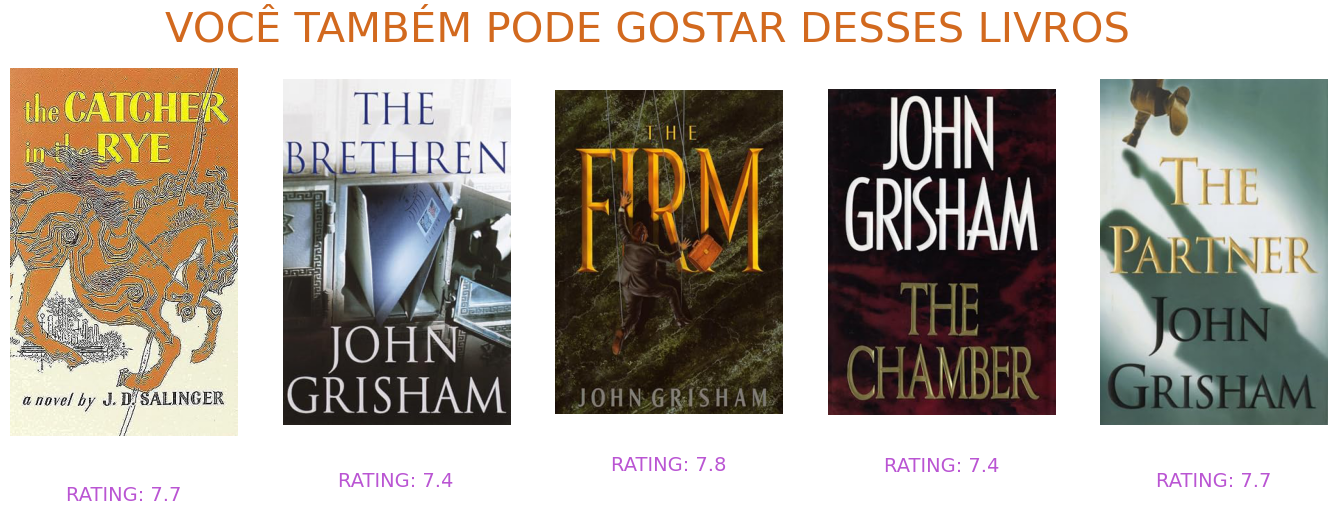

In [86]:
content_based("The Da Vinci Code")

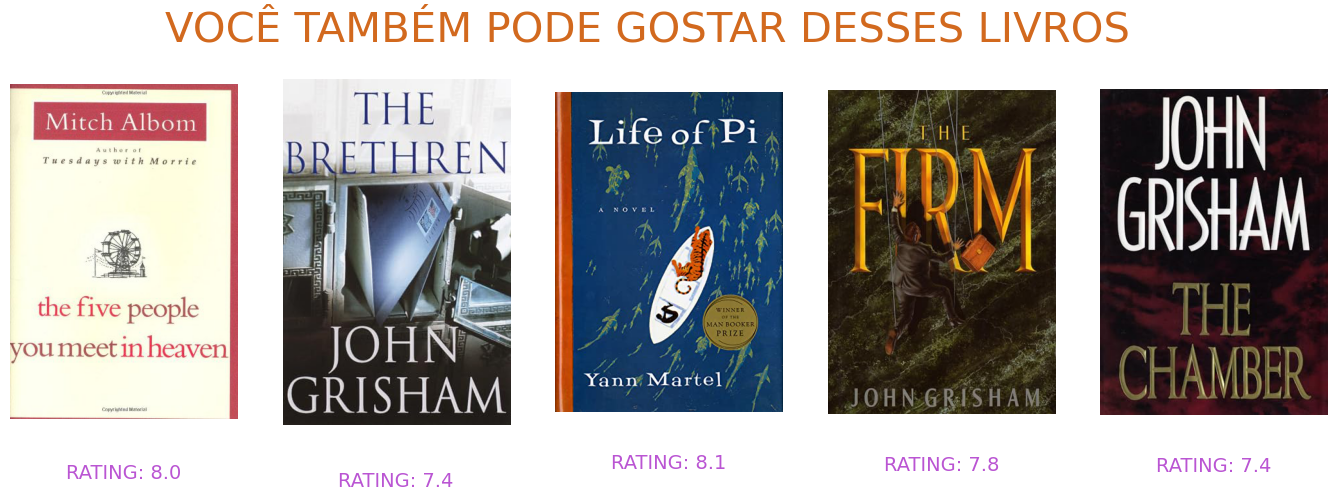

In [87]:
content_based("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")

In [88]:
content_based("A Soldier of the Great War")

Nenhuma recomendação para este livro ☹️ 
 
Voce pode tentar: 
 
Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson 

The Joy Luck Club 

The Catcher in the Rye 



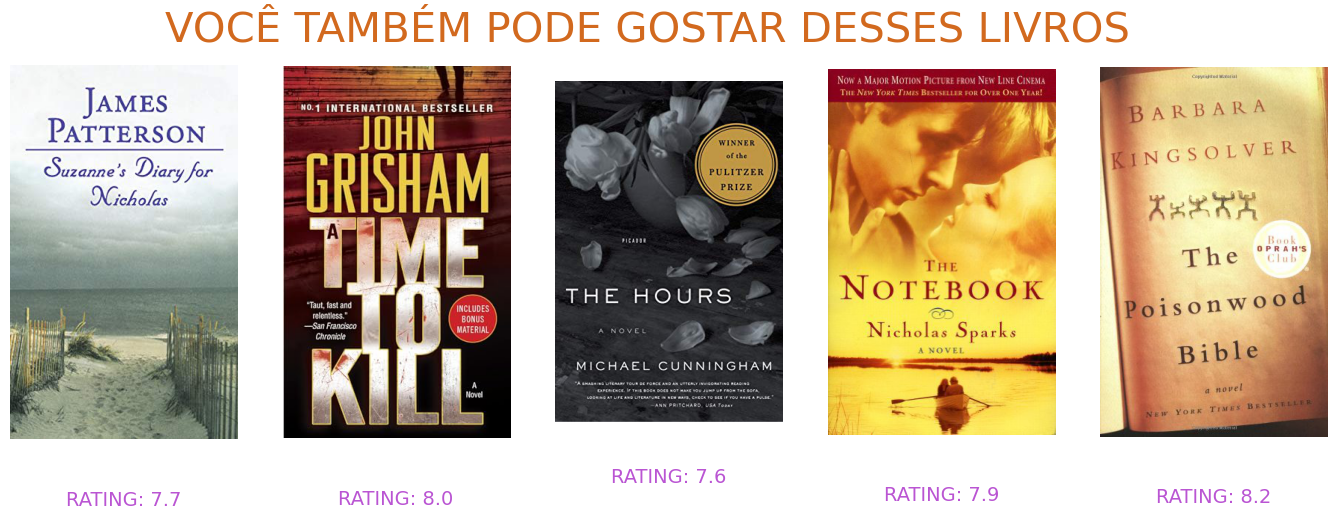

In [89]:
content_based("1st to Die A Novel")

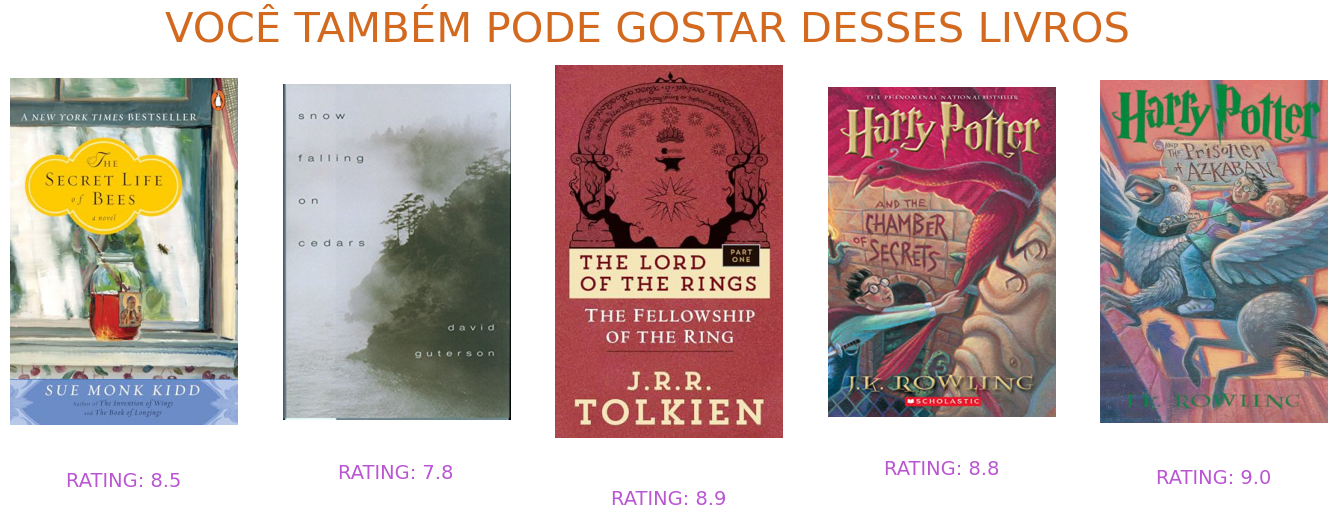

In [90]:
content_based("Life of Pi")